# Boletin 2


En este boletín vamos a hacer los 6 ejercicios del boletin de Física Nuclear del Grado de Física del año 2024/2025

# Ejercicio 5

a) Se nos pide calcular los valores de $Q_{gs}$ para la fision simétrica para todos los núcleos estables. Para calcular $Q_{gs}$ primero tenemos que saber que es $Q_{gs}$. El parámetro o valor $Q_{gs}$ de una reacción simétrica es básicamente la diferencia de las masas en reposo del nucleo original y los productos en el estado fundamental, tal que: 

$$ Q_{gs} = M(N,Z) - 2M(N/2,Z/2) $$

Ahora bien, para núcleos con $A$ y $Z$ impar. Cuando $A$ es impar (es decir, $Z$ es par y $N$ impar o vicerversa), el resultado es sencillo, ya que podemos escribir directamente: 

$$ \text{Si Z impar:} \quad Q_{gs} = M(N,Z) - M(N/2,Z//2+1)  - M(N/2,Z//2)  $$
$$ \text{Si N impar:} \quad Q_{gs} = M(N,Z) - M(N//2+1,Z/2)  - M(N//2,Z/2)  $$
donde // indica división entera (2.5//2=1,4.5//2==2...). Ahora lo interesante sucede cuando $Z$ y $N$ son impar a la vez, ya que las existen varias posibilidades: 
$$ \text{Z y N impares:} $$
$$ Q_{gs1} = M(N,Z) - M(N//2,Z//2)  - M(N//2+1,Z//2+1)  $$
$$ Q_{gs2} = M(N,Z) - M(N//2+1,Z//2)  - M(N//2,Z//2+1)  $$
que lógicamente darán valores distintos. Lo que sugerimos nosotros es hacer una media de la $Q_{gs1}$ y $Q_{gs2}$. ¿Por qué una media? Porque es la distribución menos sesgada con la información (la que maximiza la entropía) que tenemos (la única información que tenemos es que $P_{fisión \ simétrica}=P_{1}+P_{2}$) se corresponde precisamente a que ambas posibildades sean equiprobables (Luis Miguel Varela Cabo, Mecánica Estadística). En resumen: 


$$ \text{Si Z,N par:} \quad Q_{gs} = M(N,Z) - 2M(N/2,Z/2) $$
$$ \text{Si N par, Z impar:} \quad Q_{gs} = M(N,Z) - M(N/2,Z//2+1)  - M(N/2,Z//2)  $$
$$ \text{Si Z par, N impar:} \quad Q_{gs} = M(N,Z) - M(N//2+1,Z/2)  - M(N//2,Z/2)  $$
$$ \text{Si Z,N impar:} \quad Q_{gs} = M(N,Z) - \frac{1}{2} \left( M(N//2,Z//2) + M(N//2+1,Z//2+1) + M(N//2+1,Z//2) + M(N//2,Z//2+1) \right)  $$

Luego tenemos que hacer los cálculos para *todos* los núcleos estables, lo cual implica ser capaces de distinguir cuales son los núcleos estables, conocer su $N$ y $Z$ y su masa (y la masa de los productos). Esto lo hacemos a través de la tabla de datos https://www-nds.iaea.org/amdc/ame2016/nubase2016.txt que nos indica el $A$ y el tipo de núcleo, así como si es estable o no (apareciendo una marca 'stble' o un número que sería el tiempo de vida medio). Como podemos usar esta base de datos de manera completamente general sin limitarnos a usar "átomos estables", no nos vamos a poner esta limitación (que además hace el trabajo más sencillo). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:

# Reimportar librerías tras reinicio

import re

# Ruta del archivo (tras resubida necesaria)
file_path = "MassGod.txt"

# Leer el archivo de texto
with open(file_path, "r") as file:
    lines = file.readlines()

# Lista para almacenar datos
data = []

for line in lines:
    parts = re.split(r"\s+", line.strip())
    #print(parts)
    if len(parts) < 6:
        continue

    try:
        A_code = parts[0]
        if not A_code.isdigit():
            continue
        A = int(A_code) 
        Z_code = parts[1]
        Z_code = Z_code.replace("W", "")  # 
        if not Z_code.isdigit():
            continue
        Z = int(Z_code)//10
        N = A - Z
    

        mass_str = parts[3].replace("#", "")
        mass = float(mass_str) 

        # Buscar vida media o "stbl"
        lifetime = "unknown"
        for i in range(len(parts)):
            if any(unit in parts[i] for unit in ['stbl', 's', 'ms', 'us', 'ns', 'ps', 'm', 'h', 'd', 'y']):
                lifetime = " ".join(parts[i:i+3])
                break

        data.append({
            "Z": Z,
            "N": N,
            "A": A,
            "Exceso_masa_keV": mass,
            "Lifetime": lifetime
        })

    except:
        continue
# Convertir a DataFrame
df = pd.DataFrame(data)

#print(df)
#df=pd.read_csv("Ej5.csv")
#print(df)



In [4]:
# Cargar el archivo CSV directamente, tal como está, sin manipular encabezados ni columnas
#df = pd.read_csv("Ej5.csv")

# Mostrar el DataFrame crudo tal cual
#print(df)

Z = df["Z"].to_numpy()
N = df["N"].to_numpy()
mass = df["Exceso_masa_keV"].to_numpy()
lifetime=df["Lifetime"].to_numpy()

Q=np.zeros((max(Z)+1,max(N)+1))

for i in range(len(Z)+1):
    #if ('stbl' in lifetime[i] ):
    try: 
        # Z par, N par        
        Q[Z[i],N[i]]=mass[i]

        #print(mass[i])
        if (Z[i]%2==0 and N[i]%2==0):
            j=0
            while not(Z[i]/2==Z[j] and N[i]/2==N[j]):
                j+=1
                
            Q[Z[i],N[i]]+=-2*mass[j]
            #print(i)
        # Z impar, N par    
        elif (Z[i]%2!=0 and N[i]%2==0):    
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]/2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            j=0
            while not(Z[i]//2==Z[j] and N[i]/2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            
        # Z par, N impar    
        elif (Z[i]%2==0 and N[i]%2!=0):    
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]
        # Z impar, N impar    
        else: 
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2+1==Z[j] and N[i]//2==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            j=0
            while not(Z[i]//2==Z[j] and N[i]//2+1==N[j]):
                j+=1                
            Q[Z[i],N[i]]+=-mass[j]/2
            
        if (Z[i]==92 and N[i]==238-92):
            print("La masa del Uranio es:%.5e"%((238)*931.494+mass[i]/1000))    
            
            
            
            
    except IndexError:
        continue
        

La masa del Uranio es:2.21743e+05
La masa del Uranio es:2.21745e+05


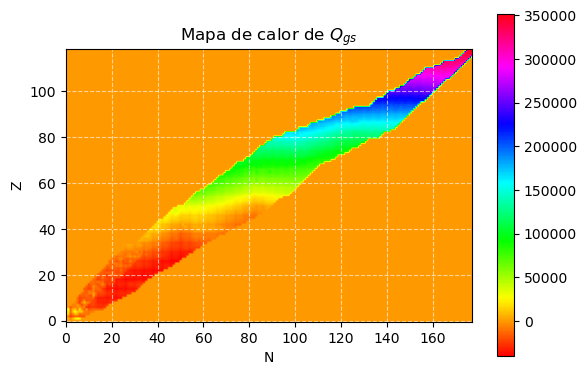

In [5]:

plt.figure(figsize=(6, 6))
plt.imshow(Q, cmap='hsv')
cbar = plt.colorbar(shrink=0.6)  # reduce la barra al 60% del alto del gráfico
plt.xlabel("N")
plt.ylabel("Z")
plt.gca().invert_yaxis()
plt.title('Mapa de calor de $Q_{gs}$')
plt.tight_layout()
plt.grid(linestyle="--",alpha=0.6,color="white")
plt.xlim(0,max(N))
plt.savefig("Qcolormap_nudat.pdf", dpi=300, bbox_inches='tight')

b) Ahora tenemos que dibujar por encima las líneas de Busaro-Gallone que marcan los límites que definen 3 regiones: las regiones de fisión antisimétrica, fisión simétrica y de fisión espotánea:

$$ 16.4 A < Z^2 < 47 A  $$

Para núcleos con $16.4A< Z^2$ tenemos que la fisión es antisimétrica, ya que la barrera presenta un máximo para estas fisiones, mientras que para $16.4 A <  Z^2 < 47 A$ la fisión simétrica presenta un mínimo en la barrera. Para átomos con $Z^2< 47 A$ la fisión es espontánea. 


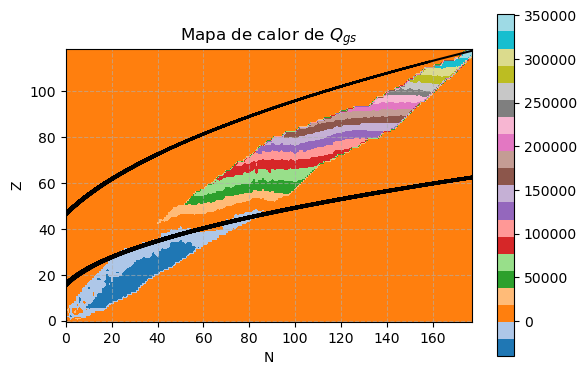

In [6]:

plt.figure(figsize=(6, 6))
plt.imshow(Q, cmap='tab20')
cbar = plt.colorbar(shrink=0.6)  # reduce la barra al 60% del alto del gráfico
plt.xlabel("N")
plt.ylabel("Z")
plt.gca().invert_yaxis()
plt.title('Mapa de calor de $Q_{gs}$')
plt.tight_layout()
plt.grid(linestyle="--",alpha=0.6)
plt.plot((Z**2-16.4*Z)/16.4,Z,color="black")
plt.plot((Z**2-47*Z)/47,Z,color="black")
plt.xlim(0,max(N))
plt.savefig("Qcolormap_nudat_BG.pdf", dpi=300, bbox_inches='tight')

# Ejercicio 6

El $^{238}$ U con $E^*=10$ MeV (energía de excitación) se fisiona en diferentes pedazos. El problema nos plantea estimar: la energía cinética total $TKE(Z)$ y la energía de exitación total $TXE(Z)$ en función del producto de la fisión. Posteriormente nos de estimar la multiplicidad de neutrones $\nu(Z)$, la distancia entre fragmentos en el punto de escisión, la energía intrínseca $E^{int}(Z)$ y la de deformación $E^{def}(Z)$ con las aproximaciones que creamos adecuados. Como dato nos dicen que la barrera de fisión $^{238}$ U es de 5.63 MeV. 

Un comentario breve que tenemos que hacer antes es el siguienet: como dato nos dan $\langle A \rangle$ que son números no enteros, mientras que nosotros sabemos que el número $A_i$ de un núcleo es un número entero. ¿Qué es entonces $\langle A \rangle$? Es, pues, un promedio de todos los posibles números másicos emitidos para cada $Z$.

Por ejemplo $Z=30$ se podría emitir con $A=74$ o con $A=79$ (con $\langle E^* \rangle= 14.7 MeV $) E. Pellereau *et all*  [#e#]<Accurate isotopic fission yields of electromagnetically induced fission of 238 U measured in inverse kinematics at relativistic energies>, cada uno con cierta probabilidad.

En general los valores como TKE no son valores fijos, siguen una distribución, y lo que damos es un valor medio. 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Vamos a imprimir los datos relevantes del U238

ZU=92           # Numero de protones 
NU=238-ZU       # Numero de neutrones
Eex=10          # Energia de excitación 
MU=2.21743e+05  # Masa del uranio en MeV


In [8]:
# LEEMOS LOS DATOS GUARDADOS EN UN TXT:

import re

# Ruta del archivo (tras resubida necesaria)
file_path = "Ej6.txt"

# Leer el archivo de texto
with open(file_path, "r") as file:
    lines = file.readlines()

# Lista para almacenar datos
data = []

for line in lines:
    try:
        parts = re.split(r"\s+", line.strip())

        Z1 = int(parts[0])
        A1 = float(parts[1])
        cuentas1=float(parts[2])
        beta1=float(parts[3])
        
        Z2 = int(parts[4])
        A2 = float(parts[5])
        cuentas2=float(parts[6])
        beta2=float(parts[7])
        
        #print(parts)
        
        data.append({
                "Z": Z1,
                "A": A1,
                "cuentas": cuentas1,
                "beta": beta1
            })
        data.append({
                "Z": Z2,
                "A": A2,
                "cuentas": cuentas2,
                "beta": beta2
            })
    except IndexError:
        continue

data.append({
    "Z": 46,
    "A": 114.9,
    "cuentas": 229,
    "beta": 0.0375
    })
# Convertir a DataFrame
df = pd.DataFrame(data)
#print(df)

Z=df["Z"].to_numpy()
A=df["A"].to_numpy()
cuentas=df["cuentas"].to_numpy()
beta=df["beta"].to_numpy()

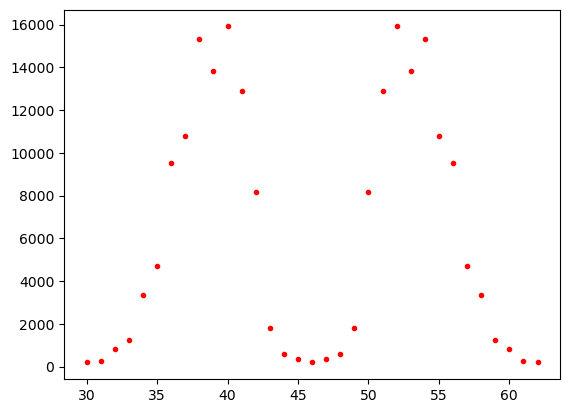

In [9]:
plt.scatter(Z,cuentas,marker=".",color="red")

 Si $E_1^k$ y $E_2^k$ son las energías cinéticas  de los fragmentos 1 y 2 respectivamente, y $E_1^x$ y $E_2^x$ las energías de excitación de 1 y 2, entonces definimos $TKE$ y $TXE$ por:

 $$ TKE = E_1^k + E_2^k \qquad TXE= E_1^x + E_2^x$$
 
y como resulta evidente, se debe verificar por conervación de la energía:

$$ Q_{g} + E^* = TKE + TXE $$
y como conocemos $Q_{g}$ ya que es la diferencia de masas entre el núcleo padre y los fragmentos (en el estado fundamental):

$$ Q_g = M(Z) - M(Z_1) - M(Z_2) $$

el problema se limita a obtener uno de los dos valores $TXE$ o $TKE$. Para calcular TKE usamos: 

$$ TKE = 1.44 \frac{Z_1Z_2}{R_1 + R_2 + d} \qquad R_i = r_0 A_i^{1/3} \left({1+\sqrt{\frac{5}{4\pi}} \beta_i}\right) $$

donde $r_0\approx 1.2$ fm. Esta expresión tiene el orgien en la fuerza coulimbiana de repulsión que obtienen inmediatamente los dos núcleos al ser objetos cargados tan próximos. Sin embargo esta ecuación presenta un problema claro: no conocemos $d$, que de hecho es un valor que posteriormente nos piden. ¿Cómo calculamos entonces TKE? Pues es bien sencillo, usando la fórmula dada por Zhao *et Al* [#e#], que es: 

$$ \text{Simetrica:} \quad  0.1173 \times Z^2/(\langle A \rangle )^{1/3} + 7.5  \ \text{MeV}  $$

$$ \text{Antisimetrica:} \quad  0.1217 \times Z^2/(\langle A \rangle )^{1/3} + 3.5  \ \text{MeV}  $$

de lo que obtenemos el siguiente valor de 

$$\langle TKE \rangle = $$ 

y como sabemos $\langle Q_{g} \rangle$ para cada nucleón, es fácil de calcular $\langle TXE \rangle$, ya que por conservación de la energía:

$$ \langle TXE \rangle =  Q_{g} - E^* - \langle TKE \rangle   $$

Sin embargo calcular $Q_g$ es un problema, ya que conocemos todos los excesos de masa $\Delta$ pero para valores enteros de $A_i,Z$, no para un $\langle A \rangle$ finito. ¿Cómo hacemos? Como no sabemos las tasas con las que se emite un átomo $Z,N_i$ (aunque si sabemos la media y que la tasa debe ser igual a la tasa total de emisión en ese canal, de lo que podríamos deducir una expresión usando el método de los multiplicadores de Lagrange que recuerda a una distribución canónica en la mecánica estadística, con lo que obtener fácilmente todas las demas propiedades) nos tendremos que conformar con una interpolación entre el entero superior e inferior.


In [12]:
# Aquí hacemos el código para calcular TKE y TXE
    

Ahora vamos a calcular la multiplicidad de neutrones $\nu (Z)$ 